### install dense basis from the updated branch using:

In [1]:
# !git clone -b sam_compression https://github.com/kartheikiyer/dense_basis.git
# %cd dense_basis
# !python setup.py install


In [2]:
# pip install statsmodels

In [3]:
import dense_basis as db
db.__version__

Starting dense_basis. Failed to load FSPS, only GP-SFH module will be available.


'0.1.9sam'

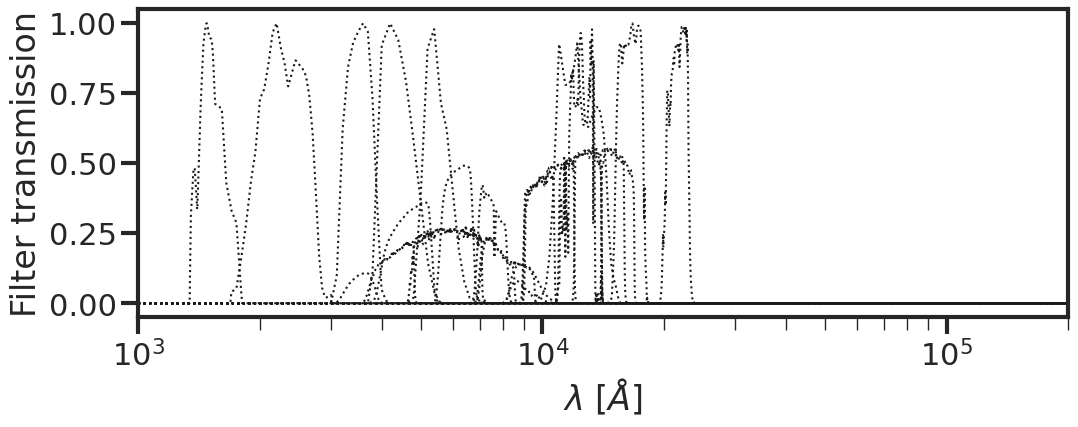

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['SPS_HOME'] = '/mnt/home/kiyer/packages/fsps/'

# work_dir = '/mnt/ceph/users/lperez/CAMELS-SAM-phot/CV/CV_0/sam-SFRHon_May11v1/0_0_0/'
# output_dir = '' # set this to work_dir if you want to store the compressed SFHs in the same place, or to ceph if you're reading from the memory-mapped drive
# sfhfile = 'sfhist_0-99.dat'

work_dir = '/mnt/ceph/users/agabrielpillai/sc-sam/tng-sam/classic/CAMELS_SAM/CV_0/samout/0_0_0/'
output_dir = '' # set this to work_dir if you want to store the compressed SFHs in the same place, or to ceph if you're reading from the memory-mapped drive
sfhfile = 'TEMP.sfhist_0-99.001.dat'

compressed_sfhfile = 'sfhist_compressed.h5'

# filter_list = 'filter_list_ltu.dat.txt'
# filt_dir = '/mnt/ceph/users/kiyer/ltu_filters/'
filter_list = 'filter_list_ltu.dat'
filt_dir = 'internal'
db.plot_filterset(filter_list, filt_dir)

nparam = 10
interpolator = 'gp-george'

grid_dir = "/mnt/ceph/users/kiyer/synthesizer_grids"
grid_name = "fsps-3.2-mist-miles_bpl-0.08,0.5,1,120-1.3,2.3,2.3.hdf5"
grid = db.Grid(grid_name, grid_dir=grid_dir, read_lines=False)

In [8]:
# sfhist_vars = db.hickle.load('sfhist_vars_small.h5')
# galz, sfharrs, tbins = sfhist_vars

id1, id2, galz, sfharrs, tbins = db.ingest_sfhist_file(work_dir, sfhfile)
sfhist_vars = [np.array(galz).copy()+0.03, sfharrs, tbins]

ValueError: invalid literal for int() with base 10: '0 0\n'

In [17]:
filter_names = ['FUV','NUV','Johnson U','Johnson B','Johnson V','Johnson J','u','g','r','i','z','J','H','Ks','F435w','F606w','F775w','F814w','F850lp','F098m','F105w','F110w','F125w','F140w','F160w']
lam_centers, lam_widths = db.get_lam_centers_widths(filter_list, filt_dir)

In [ ]:
gal_id = 1
nparam = 10
sfh_comp, sed_true, sed_comp, norm_fac, temp, tempsfh, temptime, lam, lam_mask, spec_true, spec_comp, zval = db.process_single_gal(gal_id, sfhist_vars, grid, nparam=nparam, filter_list = filter_list, filt_dir = filt_dir)

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)

# plt.plot(tbins, np.sum(sfharrs[gal_id],1), lw=3)
# plt.plot(np.amax(temptime) - temptime, np.interp(temptime, tbins, np.sum(sfharrs[gal_id],1)),'r',lw=3)
plt.plot(np.amax(temptime) - temptime, np.interp(temptime, tbins, sfharrs[gal_id][:,1]),'r',lw=3)
plt.plot(np.amax(temptime) - temptime, tempsfh,'k', lw=3)
plt.xlabel('lookback time [Gyr]'); plt.ylabel('SFR(t)')

plt.subplot(1,2,2)

plt.plot(lam[lam_mask]*(1+zval), spec_true[lam_mask],'r')
plt.plot(lam[lam_mask]*(1+zval), spec_comp[lam_mask]*norm_fac,'k')
plt.plot(lam_centers, sed_true,'ro',markersize=12)
plt.plot(lam_centers, sed_comp,'ko',markersize=12)
# plt.plot(lam_comp[lam_mask]*(1+zval), spec_true[lam_mask] - spec_comp[lam_mask],'k--')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('wavelength'); plt.ylabel('Flux density')

plt.tight_layout()
plt.show()

In [ ]:
%timeit sfh_comp, sed_true, sed_comp, norm_fac, temp, tempsfh, temptime, lam, lam_mask, spec_true, spec_comp, zval = db.process_single_gal(gal_id, sfhist_vars, grid, nparam=nparam, filter_list = filter_list, filt_dir = filt_dir)